## Importing libraries

In [1]:
%pip install tensorflow 
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Data pre-processing

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
import os 
dataset_path = r"D:/Yugam/College/3rd Year/6th Sem/Project/dataset"  # Replace with your actual path

# Check if the directory exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset directory not found: {dataset_path}")
else:
    print(f"✅ Dataset directory found: {dataset_path}")

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

✅ Dataset directory found: D:/Yugam/College/3rd Year/6th Sem/Project/dataset
Found 4217 files belonging to 4 classes.


In [6]:
class_names = dataset.class_names
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [7]:
len(dataset)

132

## Visualization

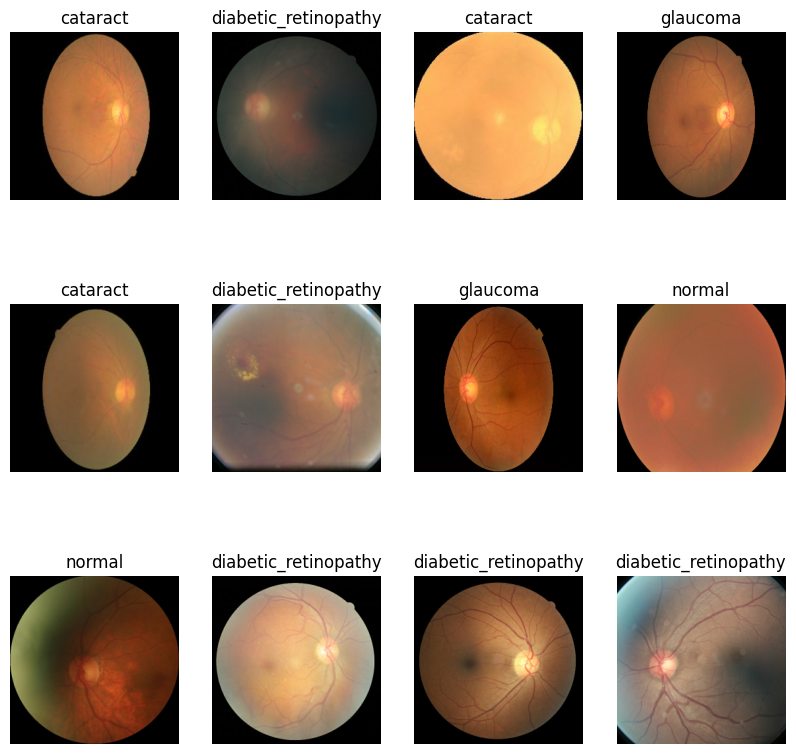

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## Dataset Split Criteria - <br>
80% ==> training <br>
10% ==> validation <br>
10% ==> testing <br>

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)  # Get the total dataset size

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    # Compute sizes for splits
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # ✅ Define `train_ds` before using it
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  # Remaining samples for test set

    return train_ds, val_ds, test_ds  # ✅ Now `train_ds` is properly defined


In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

105

In [16]:
len(val_ds)

13

In [17]:
len(test_ds)

14

In [18]:
trains_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Rescaling and resizing

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Define your image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # ✅ Remove "experimental"
    layers.Rescaling(1.0/255)
])

# Test the layer
import numpy as np
sample_image = np.random.rand(256, 256, 3)  # Simulating an image
sample_image_resized = resize_and_rescale(tf.convert_to_tensor(sample_image))

print("✅ Resizing and rescaling applied successfully!")


✅ Resizing and rescaling applied successfully!


## Data Augmentation

In [22]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # ✅ Remove "experimental"
    layers.RandomRotation(0.2)
])

# Test the augmentation layer
import numpy as np
sample_image = np.random.rand(224, 224, 3)  # Simulating an image
augmented_image = data_augmentation(tf.convert_to_tensor(sample_image))

print("✅ Data augmentation applied successfully!")



✅ Data augmentation applied successfully!


## Model Building

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define parameters
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
n_classes = 4

# ✅ Correct input shape (Remove BATCH_SIZE)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Resize and Rescale Layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# ✅ Define the model correctly
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),  # ✅ Remove BATCH_SIZE here
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# ✅ No need to manually build, model compiles automatically
model.summary()



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 577ms/step - accuracy: 0.2762 - loss: 1.3819 - val_accuracy: 0.3918 - val_loss: 1.2944
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 60s 536ms/step - accuracy: 0.4212 - loss: 1.2476 - val_accuracy: 0.5649 - val_loss: 0.9619
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 530ms/step - accuracy: 0.6109 - loss: 0.9078 - val_accuracy: 0.5793 - val_loss: 0.8905
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 528ms/step - accuracy: 0.6258 - loss: 0.8653 - val_accuracy: 0.6779 - val_loss: 0.7752
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 529ms/step - accuracy: 0.6758 - loss: 0.7539 - val_accuracy: 0.7067 - val_loss: 0.6849
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 531ms/step - accuracy: 0.7040 - loss: 0.6918 - val_accuracy: 0.7332 - val_loss: 0.6195
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 529ms/step - accuracy: 0.7103 - loss: 0.6796 - val_accuracy: 0.7548 - val_loss: 0.5939
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 59s 530ms/step - accuracy: 0.7422 - loss: 0

## Model Evaluation

In [30]:
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.8813 - loss: 0.3040


In [31]:
scores

[0.3212440311908722, 0.875]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 105}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
history.history['accuracy']

[0.31136295199394226,
 0.4840441346168518,
 0.6274977922439575,
 0.6662690043449402,
 0.6913690567016602,
 0.7130927443504333,
 0.7142857313156128,
 0.7312853932380676,
 0.7423202991485596,
 0.7673724889755249,
 0.7608112096786499,
 0.7727408409118652,
 0.7903370261192322,
 0.7796003818511963,
 0.7945123910903931,
 0.8061437606811523,
 0.8144944906234741,
 0.8150909543037415,
 0.82523113489151,
 0.8148809671401978,
 0.824999988079071,
 0.8320906758308411,
 0.8311959505081177,
 0.8276170492172241,
 0.836309552192688,
 0.8344765901565552,
 0.8416343331336975,
 0.836309552192688,
 0.8473009467124939,
 0.8481956720352173,
 0.8422308564186096,
 0.8556516766548157,
 0.8529762029647827,
 0.8583357930183411,
 0.8538622260093689,
 0.8556516766548157,
 0.8544642925262451,
 0.8598270416259766,
 0.8714584112167358,
 0.8654761910438538,
 0.8663883209228516,
 0.8690724968910217,
 0.8690724968910217,
 0.8687742352485657,
 0.8770833611488342,
 0.8717262148857117,
 0.8729496002197266,
 0.87145841121673

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



## Accuaracy and Loss Visualization

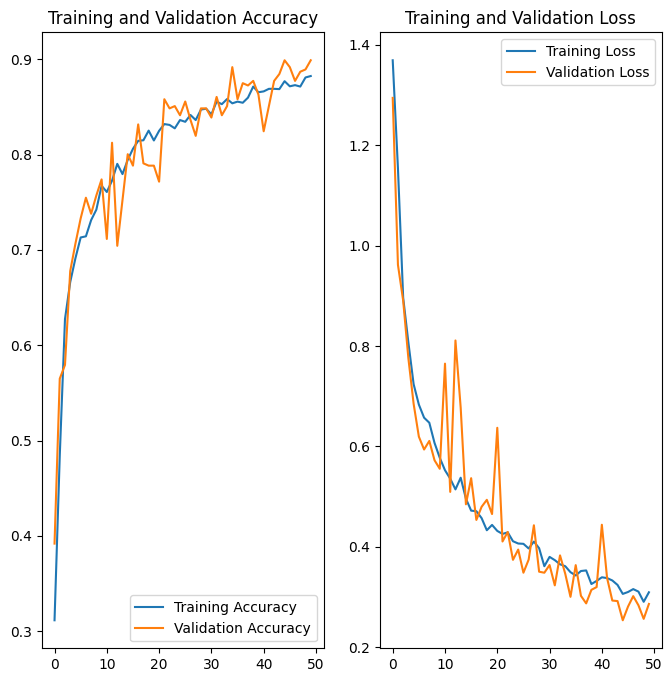

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Prediction

first image to predict
first image's actual label: normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
predicted label:  normal


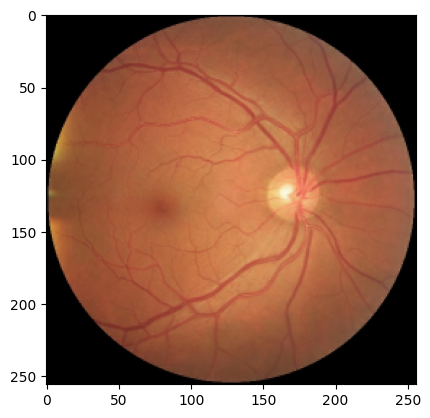

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image =images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

## Model Prediction with Confidence Scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


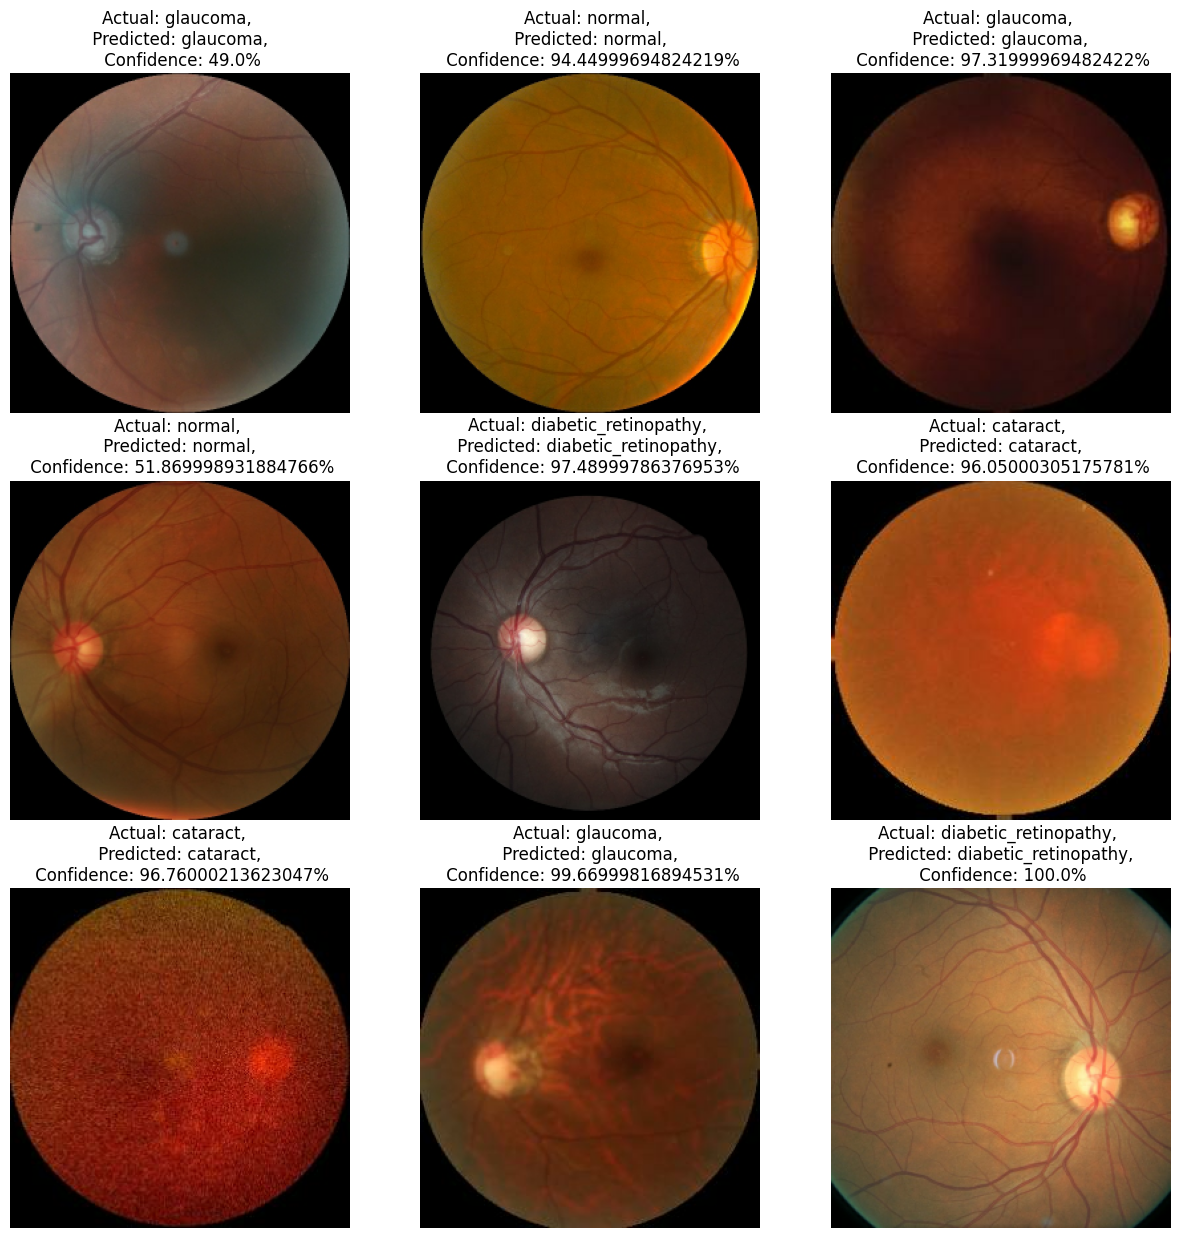

In [40]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")

## Model Saving and Versioning 

In [45]:
import os

# Define model directory
model_dir = "../model"

# ✅ Ensure the directory exists before listing
if not os.path.exists(model_dir):
    os.makedirs(model_dir)  # Creates the directory if it doesn't exist

# Get the next version number
model_version = max([int(i) for i in os.listdir(model_dir) if i.isdigit()] + [0]) + 1

# Save the model in the new versioned folder
model.save(f"{model_dir}/{model_version}.h5")


In [46]:
import os
print(os.getcwd())  # This prints the current working directory


d:\Yugam\College\3rd Year\6th Sem\Project\Eye_disease_prediction-main
